In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [2]:
df = pd.read_excel('Fashion - Assignment Data (3).xlsx', header=[1])

df.shape

(49999, 15)

In [3]:
df.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,female,cc@braintree,1,YAY15,Kaitaia,NaN,1993-10-05 00:00:00,NZ,212.5
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,male,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,female,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,female,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,female,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [4]:
df['Number_of_Products'].nunique()

263

In [5]:
df['Product_ID'].nunique()

36019

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           49999 non-null  datetime64[ns]
 1   user ID             49999 non-null  int64         
 2   ip_address          49999 non-null  object        
 3   Product_Name        49999 non-null  object        
 4   Product_ID          49999 non-null  object        
 5   Is_First_Order      49999 non-null  object        
 6   User_Gender         48825 non-null  object        
 7   Payment_Type        49999 non-null  object        
 8   Number_of_Products  49999 non-null  object        
 9   Order_Coupon_Code   11894 non-null  object        
 10  City                49662 non-null  object        
 11  Country_Province    45819 non-null  object        
 12  User_Birthday       22724 non-null  object        
 13  Country             49999 non-null  object    

# Task

### 1. Provide an overview of the brand's sales by the following attributes:
1. •	Overall - Total Sales and Revenue in the given time period
2. •	Basket - Avg. unique quantity, revenue per order.
3. •	Attributes - Time of Day, Day of Week, Geography, Payment Type
4. •	Frequency - How many are single/multiple purchasers? What is the frequency of multi-purchase? Any typical attributes?

Before Any Analysis, Exploring the data is a necessary step to do first

In [21]:
df[df['Revenue'] == 'undefined']

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
5052,2017-10-05 00:50:56,4407,66.102.6.141,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7324,2017-10-09 09:37:51,6344,66.102.6.242,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7821,2017-10-20 02:09:48,6779,66.249.88.56,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10450,2017-10-19 00:18:09,9107,66.102.6.139,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10940,2017-10-06 02:59:02,9556,66.102.6.79,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
13740,2017-10-08 05:55:50,12043,66.249.88.23,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
21219,2017-10-11 13:38:30,18641,66.249.88.23,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
23648,2017-10-07 05:45:39,20792,66.102.8.211,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
23896,2017-10-08 01:33:48,21017,66.102.8.215,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
24674,2017-10-08 05:55:52,21714,66.102.8.211,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined


There are about 15 entries in the data which appers to be wrongly stored as a result of an error in the system maybe.

I decided to drop this entries since it won't offer any value to the analysis

In [3]:
print('Before Removing undefined entries', df.shape)

df = df[df['Revenue'] != 'undefined']

print('After Removing undefined entries', df.shape)

Before Removing undefined entries (49999, 15)
After Removing undefined entries (49984, 15)


I converted the Revenue columns to integer

In [4]:
df['Revenue'] = df['Revenue'].astype(float)

In [45]:
# fill missing values
df['User_Gender'] = df['User_Gender'].fillna(df['User_Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Country_Province'] = df['Country_Province'].fillna(df['Country_Province'].mode()[0])

In [111]:
df['User_Gender'] = df['User_Gender'].map({'female':0, 'male':1}).astype(int)
df['Is_First_Order'] = df['Is_First_Order'].astype(int)

**Overall Total Sales and Revenue**

The Overall Total Revenue is given by the summation of all values in the Revenue column

In [9]:
total_revenue = round(sum(df['Revenue']), 2)

print(f"The Total Revenue is {total_revenue}")

The Total Revenue is 6699843.72


Since the sales column is not given explicitly,

The Overall Total Sales is 

**• Basket - Avg. unique quantity, revenue per order**

In [28]:
df.columns

Index(['timestamp', 'user ID', 'ip_address', 'Product_Name', 'Product_ID',
       'Is_First_Order', 'User_Gender', 'Payment_Type', 'Number_of_Products',
       'Order_Coupon_Code', 'City', 'Country_Province', 'User_Birthday',
       'Country', 'Revenue'],
      dtype='object')

In [29]:
df['Is_First_Order'].unique()

array([0, 1], dtype=object)

**Average Revenue per Order**

In [31]:
pd.DataFrame(df.groupby('Is_First_Order')['Revenue'].mean())

,Revenue
Is_First_Order,
0,137.922154
1,120.945754


**Average Unique Quantity per Order**

In [12]:
avg_unQ = pd.DataFrame(df.groupby(['Is_First_Order', 'Number_of_Products'])['Revenue'].mean().sort_values()).reset_index()
avg_unQ

,Is_First_Order,Number_of_Products,Revenue
0,0,"2,2,2,2,2,2,2,1",0.00
1,0,"1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1",0.00
2,0,"1,2,1,1,2",0.00
3,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",40.11
4,0,"1,1,2,1,2,1,1,1,2,2,1,1,2,2",44.23
...,...,...,...
318,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...",2344.23
319,0,"2,2,2,1,2,1,1",2788.94
320,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,...",3245.62
321,1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,...",3473.17


There appears to be some products that were sold to non first time orders and generated no revenue. Maybe as a result of discount or promo (coupon codes)

In [17]:
df_no_revenue = df[df['Revenue'] <= 1]

In [18]:
df_no_revenue['Revenue'].max()

0.95

In [38]:
df.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,female,cc@braintree,1,YAY15,Kaitaia,NaN,1993-10-05 00:00:00,NZ,212.50
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,male,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,female,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,female,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,female,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [39]:
df['Product_Name'].nunique(), df.Product_ID.nunique()

(33435, 36018)

**• Attributes - Time of Day, Day of Week, Geography, Payment Type**

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [20]:
# Time of Day
df['Time_of_Day'] = df['timestamp'].dt.time
df['Day_of_week'] = df['timestamp'].dt.dayofweek


In [21]:
df['Week_Day_Name'] = df['timestamp'].dt.day_name()

In [22]:
df[['Time_of_Day', 'Day_of_week', 'Week_Day_Name']].head()

,Time_of_Day,Day_of_week,Week_Day_Name
0,20:52:31,5,Saturday
1,20:55:12,5,Saturday
2,20:56:41,5,Saturday
3,20:59:27,5,Saturday
4,21:00:56,5,Saturday


In [23]:
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()

print(f"The start date for the data was {start_date} and the end date was {end_date}")

The start date for the data was 2017-10-01 00:00:23 and the end date was 2017-10-21 23:59:50


In [24]:
print('First Purchase occur at exactly', start_date)


First Purchase occur at exactly 2017-10-01 00:00:23


In [25]:
# On Average, which day does the brand make the highest revenue?

pd.DataFrame(df.groupby('Week_Day_Name')['Revenue'].mean())

,Revenue
Week_Day_Name,
Friday,129.418651
Monday,137.189925
Saturday,139.936707
Sunday,142.022981
Thursday,131.072122
Tuesday,132.736519
Wednesday,130.611464


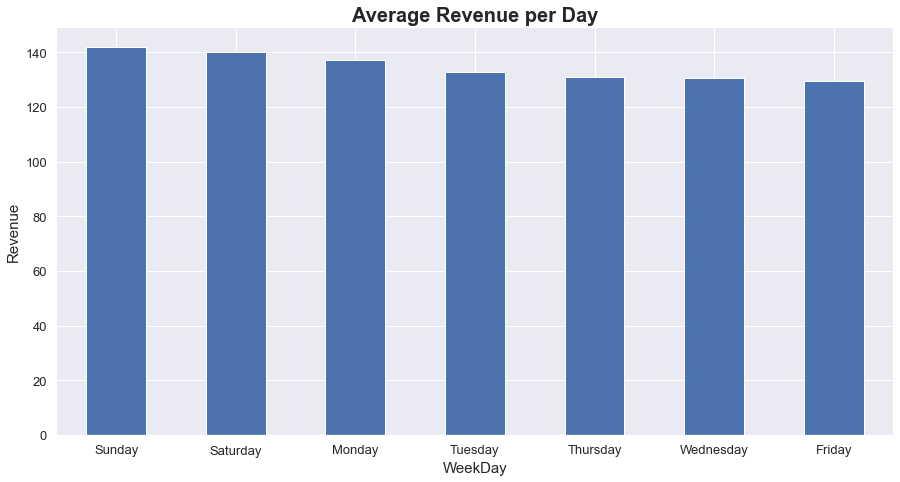

In [26]:
df.groupby('Week_Day_Name')['Revenue'].mean().sort_values(ascending=False).plot.bar(figsize=(15, 7.5))
plt.title('Average Revenue per Day', size=20, fontweight='bold')
plt.xlabel('WeekDay', size=15); plt.ylabel('Revenue', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

One Average, Highest revenue was recorded on Sunday,

**Payment Type**

In [27]:
print(f"Customer Uses {df['Payment_Type'].nunique()} Unique Payment Type")

Customer Uses 4 Unique Payment Type


In [29]:
df['Payment_Type'].unique()

array(['cc@braintree', 'pbi@afterpay', 'paypal@braintree', 'NoPayment'],
      dtype=object)

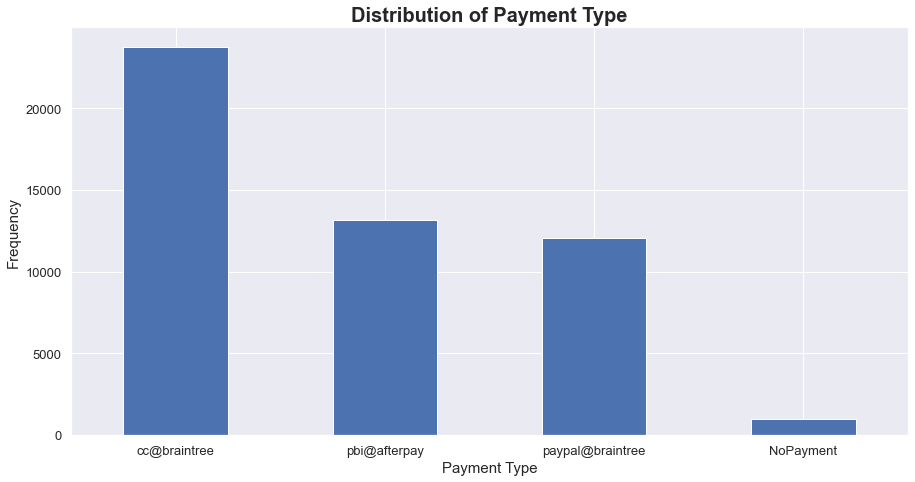

In [31]:
# which payment type is the most common amongst customers?
df['Payment_Type'].value_counts().plot.bar(figsize=(15, 7.5))
plt.title('Distribution of Payment Type', size=20, fontweight='bold')
plt.xlabel('Payment Type', size=15); plt.ylabel('Frequency', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

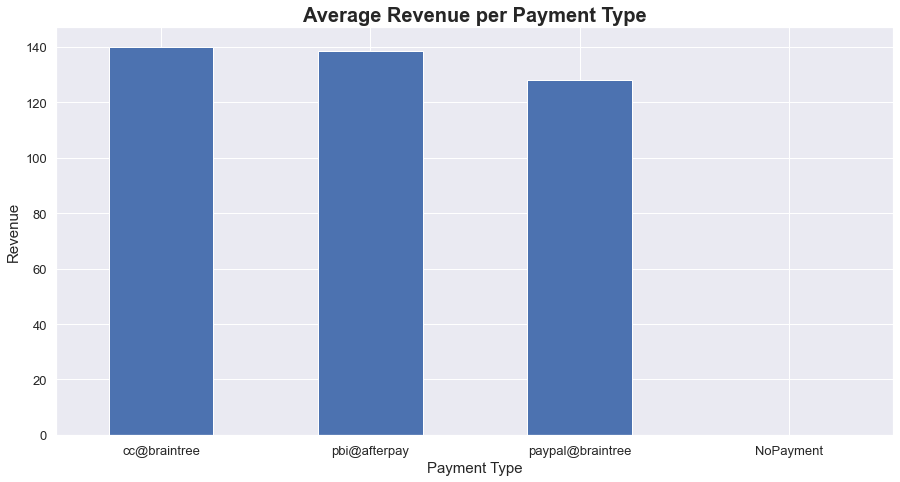

In [32]:
# which payment method generate more revenue?
df.groupby('Payment_Type')['Revenue'].mean().sort_values(ascending=False).plot.bar(figsize=(15, 7.5))
plt.title('Average Revenue per Payment Type', size=20, fontweight='bold')
plt.xlabel('Payment Type', size=15); plt.ylabel('Revenue', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

In [33]:
df['Payment_Type'].value_counts(normalize=True)*100

cc@braintree        47.541213
pbi@afterpay        26.364437
paypal@braintree    24.125720
NoPayment            1.968630
Name: Payment_Type, dtype: float64

Despite Many Users 47.54% using the `cc@braintree` method of payment, the average revenue on each payment type is almost similar with exception of NoPayment method. This tells us that 

In [47]:
# which payment type is most common on a daily basis?
pd.DataFrame(df.groupby(['Week_Day_Name','Payment_Type'])['Week_Day_Name'].count())

Week_Day_Name
Week_Day_Name Payment_Type                   
Friday        NoPayment                   123
              cc@braintree               2564
              paypal@braintree           1344
              pbi@afterpay               1426
Monday        NoPayment                   162
              cc@braintree               3726
              paypal@braintree           1718
              pbi@afterpay               1909
Saturday      NoPayment                    60
              cc@braintree               2111
              paypal@braintree           1112
              pbi@afterpay               1029
Sunday        NoPayment                    83
              cc@braintree               2884
              paypal@braintree           1398
              pbi@afterpay               1358
Thursday      NoPayment                   162
              cc@braintree               3772
              paypal@braintree           1984
              pbi@afterpay               2361
Tuesday       NoPayment                   195
              cc@braintree               4208
              paypal@braintree           2138
              pbi@afterpay               2447
Wednesday     NoPayment                   199
              cc@braintree               4498
              paypal@braintree           2365
              pbi@afterpay               2648

Some Customer uses noPayment method. Most likely they did not pay

Why?

In [48]:
df[df['Revenue'] == 'NoPayment']['Revenue'].sum()

0.0

They did not generate any revenue

**• Frequency - How many are single/multiple purchasers? What is the frequency of multi-purchase? Any typical attributes?**

By my Understanding, Single purchasers are those customers that transact only once within the dataset while multiple purchasers are the inverse

In [50]:
# finding userid with a one time occurenced
df['user ID'].nunique()

44089

In [85]:
a = dict(df['user ID'].value_counts())
len(a)

44089

In [93]:
from collections import Counter
user_id = Counter(df['user ID'])

users = pd.DataFrame(data=zip(user_id.keys(), user_id.values()), columns=['user ID', 'Count']).sort_values(by='Count', ascending=False)

users.head()

,user ID,Count
0,0,121
42174,42189,96
6036,6037,70
34678,34691,58
32445,32457,14


In [94]:
# how many single users?
users[users['Count'] == 1].size

79556

In [97]:
# how many multiple purchasers?
users[users['Count'] > 1].size

8622

### 2. Product Affinity 
Which products are more likely to sell together?

I Used an Association Rule based on Country Province

In [136]:
df['Country_Province'].value_counts()

NSW    21742
VIC    11233
QLD     5246
WA      2959
SA      2808
ACT      867
TAS      766
NT       183
Name: Country_Province, dtype: int64

In [5]:
df1 = df[df['Country_Province'] == 'SA']

In [10]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# get all the transactions as alist
transactions = list(df1['Product_Name'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder
encoder = TransactionEncoder().fit(transactions)

onehot = encoder.transform(transactions)

# convert onehot encode data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

onehot_df.head(10)

,Bodhi Top,Holly Bottoms,John Dress,"""Danny"" ChattyFeet Novelty Socks","""Petite"" Tatum Diamante Strappy Heel Sandals",003 Jeans,"1 5/8"" Polo Player Plaque Belt",134/S,1460 8 Eye Boots Smooth,2 Pack 3/4 Leggings,...,Zip Through Dress,Zoe Dress,Zoe Loafers,Zoe Tights,Zoe V-Back Tee,Zoey Off-Shoulder Top,Zoey Silky Cami,Zonal Cooling Relay Tank,Zoom All Out Low - Men's,Zsa Zsa 3/4
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
test_df = onehot_df.iloc[:, :10]
test_df.shape

(2808, 10)

In [14]:
# compute frequent items using Apriori algorithm - At least 3 items
frequent_itemsets = apriori(test_df, min_support=0.03, max_len=3, use_colnames=True)

frequent_itemsets

,support,itemsets


In [8]:
products = df1[['user ID','Product_Name']]

products.sample(10)

,user ID,Product_Name
4940,4304,"Hawaiian Swim Shorts,Ringer T-Shirt,The Sol Cr..."
10818,9445,Dimension Frill Wrap Dress
45417,40122,"Stencil Hoodie,Finns Block Stripe Tee,T-Shirt,..."
45263,39979,Freya Lace Mini Dress
10764,9397,"Ellen Laser Pants,Abrasion Denim Knee Shorts,B..."
44093,38923,"Tradie Lady 6pk G-String,Michelle Top,Core Tra..."
23845,20971,Wayside Cap
20885,18340,"Star Printed T-Shirt,Bondi Tank,Knot Crop,Isob..."
33108,29214,Women's Elite MCS Compression Tights
29185,25711,"Tubular Viral 2 W,Women's Tubular Shadow"


In [9]:
products['Product_Name'] = products['Product_Name'].str.strip()

In [ ]:
transactions

Using all the Products isn't feasible atleast on my machine. So i picked a threshold of 5 i.e the product has been bought 5 times or more

In [6]:
df1['Product_Name'] = df1['Product_Name'].str.strip()
basket = pd.pivot_table(data=df1, index='user ID', columns='Product_Name', aggfunc='sum', fill_value=0)

In [7]:
basket.shape

(2493, 2506)

In [185]:
a = products[products.groupby('Product_Name').Product_Name.transform('count')>1]
len(a)

483

In [186]:
a.head()

,user ID,Product_Name
217,90,Gia
324,180,Stacey Plunge Mini Dress
439,279,Small Canvas Clutch
559,390,Gabbi Strapless Bow Dress
603,433,Violetta Ruffle Dress


Repeating the now-infamous phrase `correlation is not causation`. The phrase means that the results from affinity analysis cannot give a cause

Affinity Analysis is a type of data mining that gives similarity between samples(objects). This could be the similarity between Users, Items 



In [187]:
onehot = a.pivot_table(index='user ID', columns='Product_Name', aggfunc=len, fill_value=0)

In [188]:
onehot.head()

Product_Name,2750 Cotu Classic,2750 Lamé,3-Pack Cotton Stretch Trunks,32mm Classic Petite,574 - Men's,90s Flock Cropped Tank,90s Sweatshirt,Air Max 90 Ultra 2.0 SE - Men's,Air Max Zero Essential - Men's,Alessandra Dress,...,Women's Nike Air Max Thea,Women's Nike Flex 2-in-1 Running Shorts,Women's Nike Juvenate,Women's Nike Sock Dart,Women's Nike Sportswear Rally Hoodie,Women's Tubular Shadow,Woven Kim Slides,X_Plr - Unisex,Yates,Yoko
user ID,,,,,,,,,,,,,,,,,,,,,
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We don't need the sum or len, we need either has taken or not. So if a user has taken that item mark as 1 else mark has 0

In [189]:
def convert_to_binary(x):
    if x > 0: return 1
    else: return 0

In [198]:
basket_sets = basket.applymap(convert_to_binary)

In [199]:
basket_sets.sample(3)

Product_Name,003 Jeans,"1 5/8"" Polo Player Plaque Belt",134/S,1460 8 Eye Boots Smooth,"2 Pack Cami Top Black,Suki Dot Dress,Astrid Sheer Shift Dress,Amalia Dobby Flutter Maxi,Juliette Flutter Dress","2 Pack Crop Leggings,Stripe Tee,Birds Fly Away Sweater",2 Pack Sheer Lace Bralettes,2 Pack Tank Top,"2-Pack Basic Trunks,Campus - Unisex",2750 Cotu Classic,...,Ziggy,"Ziggy (Reversible),Marar,Crushed Canvas Sneakers",Zoe Dress,"Zoe Loafers,Perfect Graphic Tee,Stan Smith",Zoe Tights,"Zoe V-Back Tee,Rust Roses Wrap Dress","Zoe V-Back Tee,Sunset,Mushroom Cold Shoulder Top,Ivy Frill Lace Insert Top","Zonal Cooling Relay Tank,Basic 3/4 Tights,Julia Dress","Zoom All Out Low - Men's,Women's Nike Presto Fly","Zsa Zsa 3/4,Essential Sweatpants,Cowl Neck Pullover"
user ID,,,,,,,,,,,,,,,,,,,,,
2188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# used a minimum support value of 7% which means 7 times in total number of transaction
from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

frequent_itemsets

,support,itemsets


,support,itemsets


In [ ]:
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets)

# check the first 5 rules
rules.head()

### 3. Customer Segmentation
Based on your analysis, arrive at a statistical segmentation of the brand's audience based on Revenue. The number of segments is up to you. Please provide definitions of each group.

In [5]:
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
df.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,female,cc@braintree,1,YAY15,Kaitaia,NaN,1993-10-05 00:00:00,NZ,212.50
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,male,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,female,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,female,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,female,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [21]:
no_product = list(df['Number_of_Products'].apply(lambda x: str(x).split(',')))

In [35]:
df['User_Birthday'].isna().sum()

27275

In [60]:
df['User_Birthday'] = pd.to_datetime(df['User_Birthday'])
df['User_Birthyear'] = df['User_Birthday'].dt.year
df['User_Age'] = 2017 - df['User_Birthyear']

In [61]:
df['User_Age'] = df.groupby(['User_Gender', 'City', 'Country_Province'])['User_Age'].transform(lambda x: x.fillna(x.mean()))

In [62]:
df['User_Age'] = df['User_Age'].fillna(method='ffill')
df.isna().sum()

timestamp                 0
user ID                   0
ip_address                0
Product_Name              0
Product_ID                0
Is_First_Order            0
User_Gender               0
Payment_Type              0
Number_of_Products        0
Order_Coupon_Code     38104
City                      0
Country_Province          0
User_Birthday         27274
Country                   0
Revenue                   0
User_Birthyear        27274
User_Age                  0
dtype: int64

In [63]:
df.describe()

,user ID,Revenue,User_Birthyear,User_Age
count,49983.000000,49983.000000,22709.000000,49983.000000
mean,22015.103675,133.934658,1985.342948,31.455758
std,12779.283040,130.402318,10.242642,8.257191
min,0.000000,0.000000,1900.000000,0.000000
25%,10938.500000,63.590000,1980.000000,26.333333
50%,22012.000000,98.180000,1988.000000,30.285714
75%,33115.500000,163.540000,1993.000000,34.500000
max,44103.000000,3691.500000,2017.000000,117.000000


In [52]:
df[df['Revenue'] >= 5000]

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue,User_Birthyear,User_Age
14880,2017-10-15 21:40:26,13059,58.111.129.91,"Taina Cape Dress,Jungle Juice Radius Dress,Lee...","MO542AA41WPU,TH909AA83MSI,TU931AA37ANU,HO372AA...",0,female,cc@braintree,"1,2,2,1,1,1,1,1,1,2,1,2,2,1,1,1,2,2,1,1,2,2,2,...",NaN,Lane Cove North,NSW,NaT,AU,5387.71,NaN,35.75


Because of Analysis and for proper segmentation, the extreme value can be removed. Esscentially, it is an outlier but a good outlier

In [53]:
df = df[df['Revenue'] < 5000]

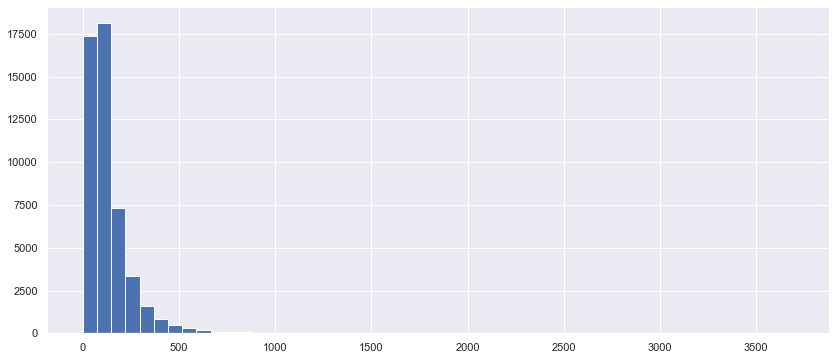

In [54]:
plt.figure(figsize=(14, 6))
plt.hist(df['Revenue'], bins=50, );

Highly Skewed a left tail

In [55]:
df.Revenue.describe()

count    49983.000000
mean       133.934658
std        130.402318
min          0.000000
25%         63.590000
50%         98.180000
75%        163.540000
max       3691.500000
Name: Revenue, dtype: float64

### Visualize the Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

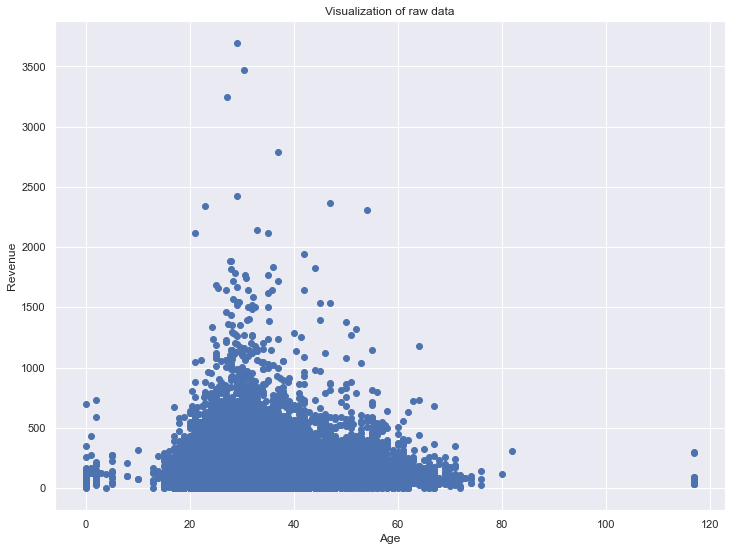

In [64]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df['User_Age'], df['Revenue'])
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.title('Visualization of raw data')

Most of the Revenue revolves around the mean. There exist some users with age greater than 100

In [112]:
df_segmentation = df[['User_Age', 'Revenue', 'Is_First_Order', 'User_Gender']]

In [113]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

### K-Means Clustering

In [114]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

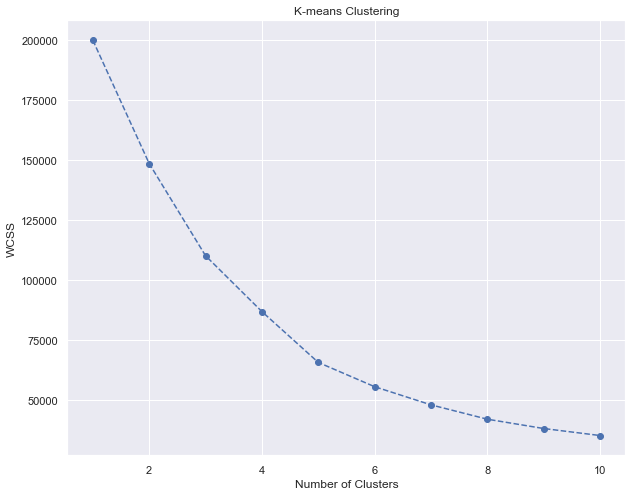

In [115]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [116]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [117]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Results

In [118]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [119]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,user ID,Is_First_Order,User_Gender,Revenue,User_Birthyear,User_Age
Segment K-means,,,,,,
0,22088.434794,0.000000,0.00000,114.136254,1989.927562,28.383354
1,21963.565751,1.000000,0.00000,115.419780,1987.947705,30.873071
2,22097.413123,0.387927,1.00000,121.524572,1987.215366,30.398396
3,21745.547107,0.021742,0.01602,231.444106,1971.976867,43.327883


In [120]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','City']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [121]:
df_segm_analysis

,user ID,Is_First_Order,User_Gender,Revenue,User_Birthyear,User_Age,N Obs,Prop Obs
Segment K-means,,,,,,,,
0,22088.434794,0.000000,0.00000,114.136254,1989.927562,28.383354,26194,0.524058
1,21963.565751,1.000000,0.00000,115.419780,1987.947705,30.873071,8304,0.166136
2,22097.413123,0.387927,1.00000,121.524572,1987.215366,30.398396,7620,0.152452
3,21745.547107,0.021742,0.01602,231.444106,1971.976867,43.327883,7865,0.157354


In [122]:
df_segm_analysis.rename({0:'fewer-opportunities',
                         1:'average',
                         2:'standard',
                         3:'well-off'})

,user ID,Is_First_Order,User_Gender,Revenue,User_Birthyear,User_Age,N Obs,Prop Obs
Segment K-means,,,,,,,,
fewer-opportunities,22088.434794,0.000000,0.00000,114.136254,1989.927562,28.383354,26194,0.524058
average,21963.565751,1.000000,0.00000,115.419780,1987.947705,30.873071,8304,0.166136
standard,22097.413123,0.387927,1.00000,121.524572,1987.215366,30.398396,7620,0.152452
well-off,21745.547107,0.021742,0.01602,231.444106,1971.976867,43.327883,7865,0.157354


In [123]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'fewer-opportunities',
                                                                 1:'average',
                                                                 2:'standard',
                                                                 3:'well-off'})

In [124]:
df_segm_kmeans.head(2)

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue,User_Birthyear,User_Age,Segment K-means,Labels
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,0,cc@braintree,1,YAY15,Kaitaia,NSW,1993-10-05,NZ,212.50,1993.0,24.0,0,fewer-opportunities
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,1,pbi@afterpay,1,NaN,Shepparton,VIC,NaT,AU,526.36,NaN,24.0,2,standard


In [128]:
# plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = 'User_Age'
y_axis = 'Revenue'
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'], data=df_segm_kmeans)
plt.title('Segmentation K-means')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 864x576 with 1 Axes>

Since the separation is not so clear, i employed the PCA dimentionality reduction method

In [129]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [130]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [131]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.29696098, 0.24940507, 0.24377   , 0.20986395])

Text(0, 0.5, 'Cumulative Explained Variance')

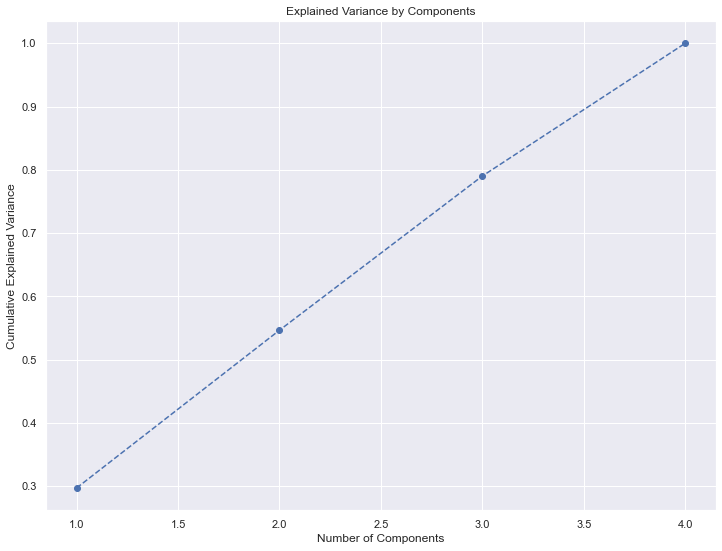

In [133]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [134]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [135]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

#### PCA Results

In [136]:
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[ 0.21857039,  0.3234744 , -0.65881712, -0.64307954],
       [ 0.82138902,  0.44816995,  0.24170809,  0.25698437],
       [-0.52365592,  0.82505726,  0.02567497,  0.21072683]])

In [137]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,User_Age,Revenue,Is_First_Order,User_Gender
Component 1,0.218570,0.323474,-0.658817,-0.643080
Component 2,0.821389,0.448170,0.241708,0.256984
Component 3,-0.523656,0.825057,0.025675,0.210727


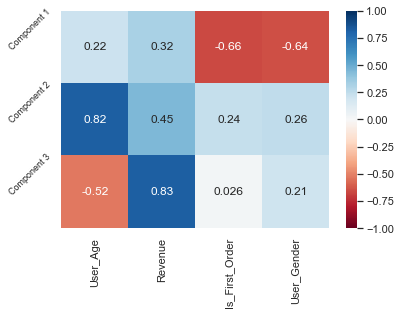

In [138]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9);
plt.show()

In [139]:
scores_pca = pca.transform(segmentation_std)

#### PCA with K-Means

In [140]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

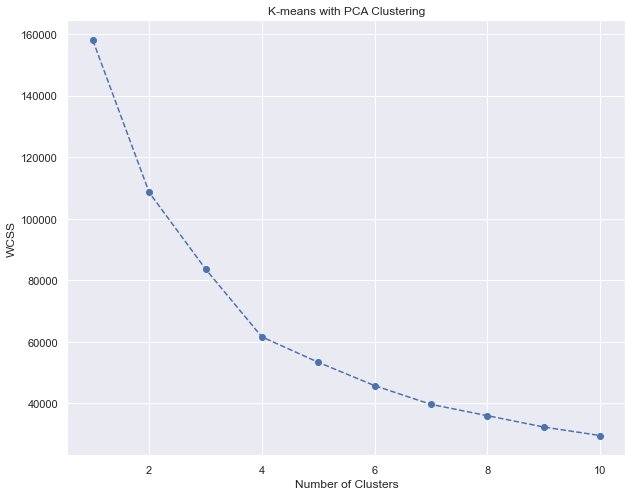

In [141]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [142]:
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [143]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [144]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [145]:
df_segm_pca_kmeans

,User_Age,Revenue,Is_First_Order,User_Gender,Component 1,Component 2,Component 3,Segment K-means PCA
0,24.000000,212.50,0,0,0.631671,-0.713324,0.865701,0
1,24.000000,526.36,1,1,-1.935457,1.651012,3.494962,2
2,34.500000,77.23,1,0,-0.994575,0.441780,-0.594929,1
3,31.000000,190.91,0,0,0.763408,-0.091190,0.285168,0
4,30.627119,204.09,0,0,0.786232,-0.082985,0.392206,0
...,...,...,...,...,...,...,...,...
49978,30.176471,99.09,0,1,-1.263219,0.221456,0.338756,1
49979,26.000000,30.87,0,0,0.234058,-1.138608,-0.410324,0
49980,16.000000,236.36,1,0,-1.089541,-0.851630,1.585147,1
49981,26.000000,257.19,0,0,0.795470,-0.360778,1.021620,0


In [164]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,User_Age,Revenue,Is_First_Order,User_Gender,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,
0,28.400992,111.387980,0.000000,0.000000,0.497348,-0.623036,-0.053148
1,29.782399,108.586326,0.714683,0.482180,-1.450975,0.258471,0.165988
2,31.417473,509.132545,0.097561,0.099682,1.233668,1.170960,2.336121
3,46.543318,117.689622,0.091882,0.052902,0.755080,1.293804,-1.127420


In [165]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','User_Gender']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'average', 
                                                          1:'fewer opportunities',
                                                          2:'extremely rich', 
                                                          3:'standard'})
df_segm_pca_kmeans_freq

,User_Age,Revenue,Is_First_Order,User_Gender,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,
average,28.400992,111.387980,0.000000,0.000000,0.497348,-0.623036,-0.053148,25599,0.512154
fewer opportunities,29.782399,108.586326,0.714683,0.482180,-1.450975,0.258471,0.165988,14731,0.294720
extremely rich,31.417473,509.132545,0.097561,0.099682,1.233668,1.170960,2.336121,2829,0.056599
standard,46.543318,117.689622,0.091882,0.052902,0.755080,1.293804,-1.127420,6824,0.136526


In [166]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'average', 
                                                          1:'fewer opportunities',
                                                          2:'extremely rich', 
                                                          3:'standard'})

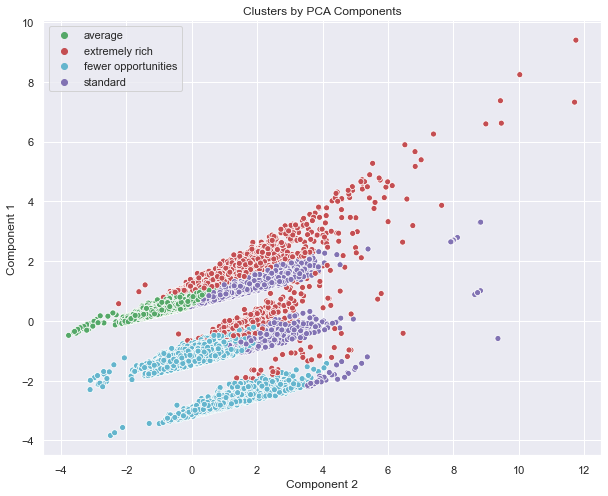

In [177]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
hue = df_segm_pca_kmeans['Legend'].values
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = hue, palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

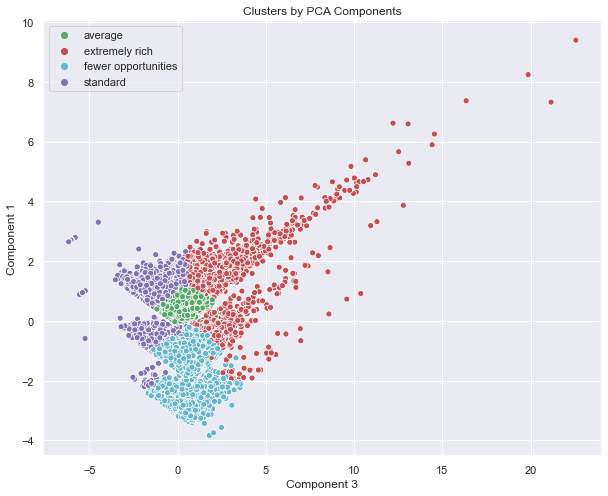

In [178]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

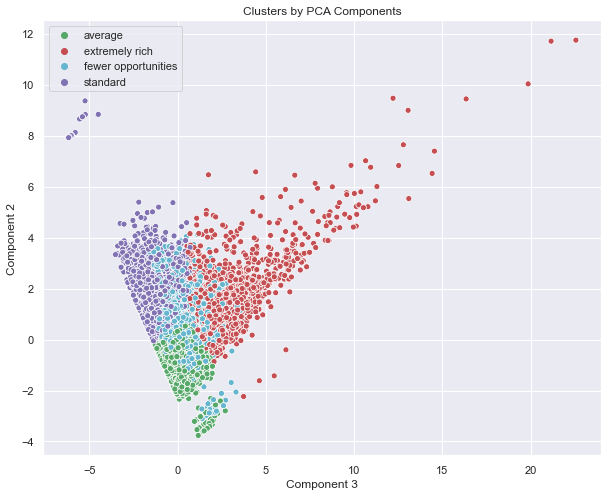

In [179]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [163]:
y_kmeans = kmeans_pca.labels_

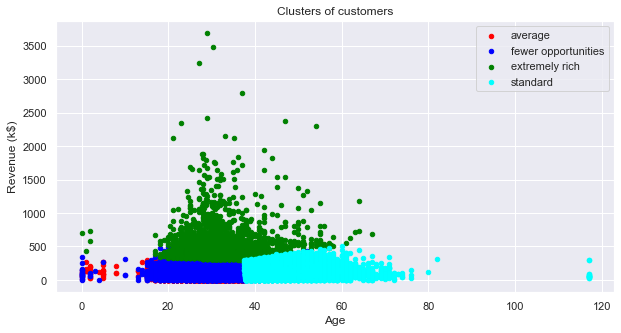

In [173]:
# unzip all values for all column in X DataFrame and store them in x(array)
x = df_segm_pca_kmeans.values

plt.figure(figsize=(10,5))
# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'average')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'fewer opportunities')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'extremely rich')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'standard')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Revenue (k$)')
plt.legend() #Show labels in all scatter plots as legend
plt.show()

**Provide Definition of each group**
1. Average: these are customers which gives the brand an average revenue value (111)
2. Fewer Opportunities: Are Customers in which 70% orders a product for the first time and return a smaller revenue value on Average
3. Extremely Rich: These Customers transactions returns a very high revenue to the brand, they buy many products and majority are female (90%)
4. Standard: Provides a good revenue to the brand, majority are female (91%) and buys regularly from the brand